# Welcome to TikTok Dance Analyzer
* Before running this notebook, make sure the hardware accelerator GPU is turned ON 
* (Edit >  Notebook Settings > Hardware Accelerator > GPU > Save Changes)

# Running the notebook
* Runtime > Run all
* It may give an error 'Failed to fetch' at the download video part, but try to run that cell again and the remaining cells after

# Results
* This notebook shows our gradual progress of analyzing the keypoints
* Predicting the virality hasn't been perfected yet due to lack of GPU capabilities and other resources, hence left for future work

# Thank You

#Installing Detectron2 dependencies

In [1]:
# install dependencies: (use cu100 because colab is on CUDA 10.0)
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 24kB/s 
     |████████████████████████████████| 4.1MB 75.7MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 276kB 7.6MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=93bef8eb881658d9748574d0da486db87598a04e97d4e091974c0795c6fac04b
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-b

In [2]:
# install detectron2:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
     |████████████████████████████████| 6.2MB 1.3MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.dev200424-cp36-none-any.whl size=40523 sha256=af4d8b95d78bd09cec3f53af3b4fc5c0e074d8734970ef1d114fa7b1bf60dbc3
  Stored in directory: /root/.cache/pip/wheels/68/20/6d/36730421a68849a49c4c7470411f9192b7fa5ec9093cf1c7b8
Successfully built fvcore


In [0]:
import torch
import torchvision
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Let's try COCO KeyPoint Segmentation on a TikTok Video

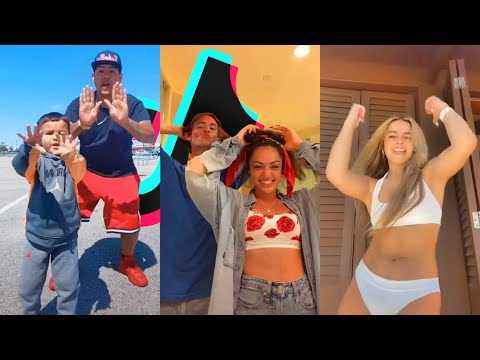

In [4]:
# This is the video we're going to process
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("S5zttDDYGJo", width=500)
display(video)

In [5]:
# Install dependencies, download the video, and crop 5 seconds for processing
!pip install youtube-dl
!pip uninstall -y opencv-python opencv-contrib-python
!apt install python3-opencv  # the one pre-installed have some issues
!youtube-dl https://www.youtube.com/watch?v=S5zttDDYGJo -f 22 -o original_clip.mp4
!ffmpeg -i original_clip.mp4 -t 00:00:05 -c:v copy cropped_clip.mp4

     |████████████████████████████████| 1.8MB 8.7MB/s 
Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Successfully uninstalled opencv-contrib-python-4.1.2.30
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  python3-opencv
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 534 kB of archives.
After this operation, 2,941 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [534 kB]
Fetched 534 kB in 0s (4,428 kB/s)
Selecting previously unselected package python3-opencv.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../python3-opencv_3.2.0+dfsg-4ubuntu0.1_amd64.deb ...
Unpacking python3-opencv (3.2.0+dfsg-4ubuntu0.1) ...
Setting up python3

In [6]:
# Run the keypoint segmentation model on the video
!git clone https://github.com/thatguySid/detectron2.git
!python detectron2/demo/demo.py --config-file detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml --video-input cropped_clip.mp4 --confidence-threshold 0.6 --output output_clip.mp4 \
  --opts MODEL.WEIGHTS detectron2://COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/138363331/model_final_997cc7.pkl

Cloning into 'detectron2'...
remote: Enumerating objects: 3643, done.
remote: Total 3643 (delta 0), reused 0 (delta 0), pack-reused 3643
Receiving objects: 100% (3643/3643), 2.16 MiB | 3.81 MiB/s, done.
Resolving deltas: 100% (2523/2523), done.
Failed to load OpenCL runtime
[04/28 22:57:47 detectron2]: Arguments: Namespace(confidence_threshold=0.6, config_file='detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/138363331/model_final_997cc7.pkl'], output='output_clip.mp4', video_input='cropped_clip.mp4', webcam=False)
[04/28 22:57:52 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/138363331/model_final_997cc7.pkl
[04/28 22:57:52 fvcore.common.file_io]: Downloading https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/138363331/model_final_997cc7.pkl ...
[04/28 22:57:52 fvcore.common.download]: 

In [7]:
# Download the video to see the results
from google.colab import files
files.download('output_clip.mp4')

MessageError: ignored

# Getting Keypoint Instances from a Video

In [0]:
"Here we collect the sequence of keypoint coordinates for each instance in the video"
import cv2
import numpy as np
import os, sys
import time

start = time.time()
frames = []
kpts = []
frame_count = 0
# Colab GPU fits 3 images at once
batch_size = 1

In [9]:
# Setup directory
ROOT_DIR = os.getcwd()
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
VIDEO_DIR = os.path.join(ROOT_DIR, "videos")
VIDEO_SAVE_DIR = os.path.join(VIDEO_DIR, "save")

# Start video capture
capture = cv2.VideoCapture('output_clip.mp4')
try:
  if not os.path.exists(VIDEO_SAVE_DIR):
    os.makedirs(VIDEO_SAVE_DIR)
  if (capture.isOpened()== False): 
    print("Error opening video stream or file")
except OSError:
  print ('Error: Creating directory of data')

# Set dimentions
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

False

In [10]:
# Set the model configs
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
end_init = time.time()

print(f'Initialization took {end_init - start} s')
# Processing the video in batches
while True:
  ret, frame = capture.read()
  if not ret:
    break

  frame_count += 1
  frames.append(frame)
  print('frame_count :{0}'.format(frame_count))
  
  if len(frames) == batch_size:
    tmp_start = time.time()
    inpt = [{'image': torch.from_numpy(x).float().permute(2,0,1), 'height':1080, 'width':1920} for x in frames]
    outputs = predictor.model(inpt)
    kpts.append(outputs[0]['instances'].pred_keypoints)
    tmp_end = time.time()
    print(f'Processing {batch_size} many frames took {tmp_end - tmp_start} s')
    # Clear the frames array to start the next batch
    frames=[]

end = time.time()
print(f'Processing all frames took {end_init - end} seconds') 
# When everything done, release the video capture
capture.release()
cv2.destroyAllWindows()
print('Task Finished')

Initialization took 4.933597087860107 s
frame_count :1
Processing 1 many frames took 0.12739253044128418 s
frame_count :2
Processing 1 many frames took 0.12044310569763184 s
frame_count :3
Processing 1 many frames took 0.11709332466125488 s
frame_count :4
Processing 1 many frames took 0.11511516571044922 s
frame_count :5
Processing 1 many frames took 0.11600017547607422 s
frame_count :6
Processing 1 many frames took 0.12015604972839355 s
frame_count :7
Processing 1 many frames took 0.11517930030822754 s
frame_count :8
Processing 1 many frames took 0.11451172828674316 s
frame_count :9
Processing 1 many frames took 0.11589336395263672 s
frame_count :10
Processing 1 many frames took 0.11542463302612305 s
frame_count :11
Processing 1 many frames took 0.11448192596435547 s
frame_count :12
Processing 1 many frames took 0.11299347877502441 s
frame_count :13
Processing 1 many frames took 0.11271476745605469 s
frame_count :14
Processing 1 many frames took 0.11478257179260254 s
frame_count :15
P

In [0]:
# Getting the coordinates in a tensor
kpts_0 = [x[0] for x in kpts]
res = torch.FloatTensor([1920, 1080, 1]).unsqueeze(0).unsqueeze(0).cuda()
kpts_tensor = torch.stack(kpts_0, dim=0)

In [0]:
# Getting the standard keypoints in a tensor
standard_kpts = [x/res for x in kpts]

In [13]:
# Display the keypoint results to the user
standard_kpts = kpts_tensor / res
print(standard_kpts)

tensor([[[0.5554, 0.4467, 0.2022],
         [0.5601, 0.4384, 0.2100],
         [0.5508, 0.4384, 0.1958],
         ...,
         [0.5454, 0.7089, 0.2184],
         [0.5624, 0.7866, 0.1086],
         [0.5477, 0.7977, 0.1468]],

        [[0.3720, 0.4873, 0.1620],
         [0.3751, 0.4790, 0.1285],
         [0.3743, 0.4776, 0.0934],
         ...,
         [0.3945, 0.7384, 0.1183],
         [0.3626, 0.8466, 0.0651],
         [0.4085, 0.8244, 0.0790]],

        [[0.3694, 0.4854, 0.0840],
         [0.3818, 0.4687, 0.0834],
         [0.3749, 0.4687, 0.1554],
         ...,
         [0.3919, 0.7363, 0.1260],
         [0.3586, 0.8513, 0.0825],
         [0.4082, 0.8208, 0.0988]],

        ...,

        [[0.4723, 0.3095, 0.3817],
         [0.4800, 0.2915, 0.3545],
         [0.4645, 0.2956, 0.4718],
         ...,
         [0.4870, 0.8009, 0.0129],
         [0.4645, 0.9633, 0.0167],
         [0.4933, 0.9633, 0.0132]],

        [[0.3748, 0.4338, 0.0955],
         [0.3825, 0.4255, 0.0989],
         [0.

In [0]:
# Getting x and y coordinates per frame
height = 100
num_frames = len(standard_kpts)
width = 100
pose_video = np.zeros([num_frames, height, width])
for i in range(num_frames):
    for instance in standard_kpts[i]:
        x_tmp = round(instance[0].item() * width)
        y_tmp = round(instance[1].item() * height)
        pose_video[i, y_tmp, x_tmp] = 1

In [15]:
# Animate the keypoints collected into a video to show the user
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# np array with shape (frames, height, width, channels)

fig = plt.figure()
im = plt.imshow(pose_video[0,:,:])

plt.close() # this is required to not display the generated image

def init():
    im.set_data(pose_video[0,:,:])

def animate(i):
    im.set_data(pose_video[i,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=pose_video.shape[0],
                               interval=50)
HTML(anim.to_html5_video())

In [16]:
# The resulting video per instance
from IPython.display import HTML

HTML(anim.to_html5_video())